# Connected components

In a graph with a single connected component, a path can be found connect-ing any pair of vertices. 

This task will explore experimentally finding out howmany random edges need to be added in a random graph with a given number of vertices until a single connected component is obtained.

A plot should be produced that shows for growing numbers of initial vertices how many edges had to be added.

Since we are dealing with a randomized experiment results should show the average outcome of a given number of independent experiments (consider a sample size of at least 30).

In [11]:
from math import exp
import networkx as nx
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def createGraph(n_nodes):
    graph = nx.Graph()
    
    for i in range(n_nodes):
        graph.add_node(i)
    
    while not nx.is_connected(graph):
        edge = random.choice(list(nx.non_edges(graph)))
        graph.add_edge(edge[0], edge[1])
    
    return graph

NODES: 1 - EDGES: 0.00
NODES: 2 - EDGES: 1.00
NODES: 3 - EDGES: 2.00
NODES: 4 - EDGES: 3.27
NODES: 5 - EDGES: 4.47
NODES: 6 - EDGES: 5.97
NODES: 7 - EDGES: 7.87
NODES: 8 - EDGES: 9.67
NODES: 9 - EDGES: 10.10
NODES: 10 - EDGES: 12.80
NODES: 11 - EDGES: 15.13
NODES: 12 - EDGES: 15.00
NODES: 13 - EDGES: 18.60
NODES: 14 - EDGES: 19.60
NODES: 15 - EDGES: 23.00
NODES: 16 - EDGES: 25.87
NODES: 17 - EDGES: 26.20
NODES: 18 - EDGES: 28.77
NODES: 19 - EDGES: 30.23
NODES: 20 - EDGES: 33.73
NODES: 21 - EDGES: 32.40
NODES: 22 - EDGES: 35.23
NODES: 23 - EDGES: 38.37
NODES: 24 - EDGES: 41.50
NODES: 25 - EDGES: 44.60
NODES: 26 - EDGES: 47.73
NODES: 27 - EDGES: 50.90
NODES: 28 - EDGES: 53.17
NODES: 29 - EDGES: 52.13


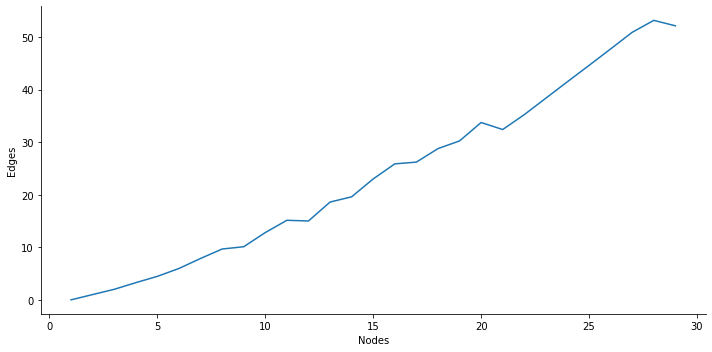

In [15]:
nodes = [i for i in range(1, 30)]
samples = 30
edges = []

for n in nodes:
    total_edges = 0.0
    for i in range(samples):
        total_edges += createGraph(n).number_of_edges()
    edges.append(total_edges/samples)
    print("NODES: %d - EDGES: %.2f" % (n, edges[-1]))


df = pd.DataFrame()
df['Nodes'] = nodes
df['Edges'] = edges


sns.relplot(
    data=df, 
    x="Nodes", y="Edges", 
    kind="line", height=5, aspect=2
)

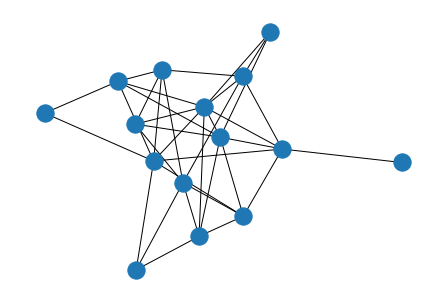

In [16]:
graph = createGraph(15)

nx.draw(graph)

(array([1., 1., 2., 0., 1., 5., 0., 2., 2., 1.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

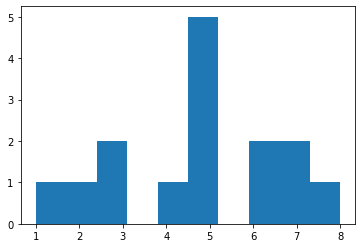

In [17]:
data = [graph.degree[x] for x in range(graph.number_of_nodes())]

plt.hist(data)